In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

In [39]:
df=pd.read_excel(r"D:\Utility_management\grafana_data_export.xlsx")
df.head()

,Time,EM_Voltage Ph1-N (V),EM_Current Ph1 (A),EM_Energy (kWh),EM_id
0,2020-04-28 05:54:27,245.3,211.2,200.36 K,1
1,2020-04-28 05:54:25,245.3,210.3,199.81 K,1
2,2020-04-28 05:54:23,245.3,210.3,199.79 K,1
3,2020-04-28 05:54:21,245.4,208.3,200.68 K,1
4,2020-04-28 05:54:19,245.3,201.3,200.42 K,1


In [40]:
df['EM_id'].unique()

array([1], dtype=int64)

In [41]:
df.shape

(641742, 5)

In [42]:
df1=df[(df['Time'] >= '2020-04-27 00:00:00') & (df['Time'] < '2020-04-28 00:00:00') ]

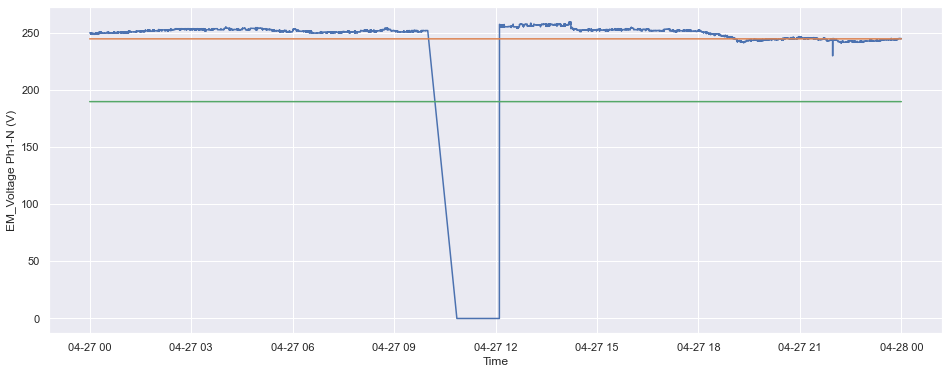

In [43]:
sns.set(style="darkgrid")

plt.figure(figsize=(16, 6)) 
 
# Plot the responses for different events and regions
sns.lineplot(x="Time", y="EM_Voltage Ph1-N (V)",
             data=df1)
sns.lineplot(x="Time",y=245,data=df1)
sns.lineplot(x="Time",y=190,data=df1)

In [44]:
voltage0=df1[df1['EM_Voltage Ph1-N (V)'] == 0]
df1=df1[(df1['EM_Voltage Ph1-N (V)'] > 0)]

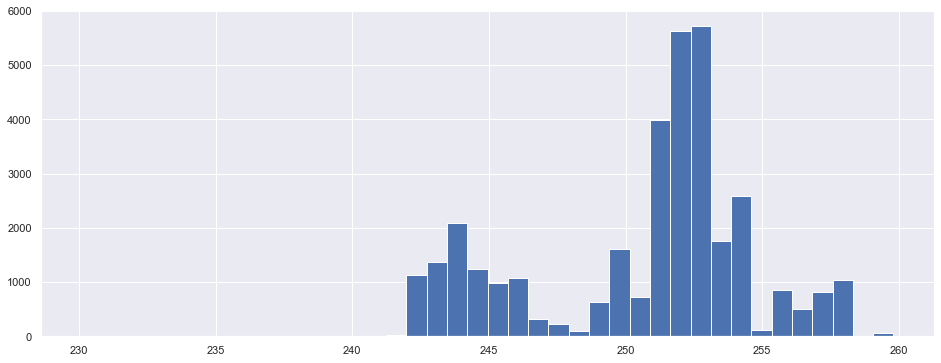

In [45]:
plt.figure(figsize=(16, 6)) 
plt.hist(df1['EM_Voltage Ph1-N (V)'],bins=40)
#plt.axvline(x.mean(), color='k', linestyle='dashed', linewidth=1)
plt.show()

In [46]:
df1['EM_Voltage Ph1-N (V)'].describe()

count    34613.000000
mean       250.699662
std          4.091966
min        230.100000
25%        249.000000
50%        252.000000
75%        253.100000
max        259.800000
Name: EM_Voltage Ph1-N (V), dtype: float64

In [47]:
df1['EM_Voltage Ph1-N (V)'].std()

4.091966455527622

In [48]:
### Values More than 75%ile
more_than_75=len(df1[df1['EM_Voltage Ph1-N (V)'] > np.percentile(df1['EM_Voltage Ph1-N (V)'], 75)])
print("values lying between 75 percentile and max ",more_than_75 )

     

values lying between 75 percentile and max  7762


In [49]:
### Value more than threshold
print("Values more than Threshold ",len(df1[(df1['EM_Voltage Ph1-N (V)'] > 245) | (df1['EM_Voltage Ph1-N (V)'] < 190)]))
#out_of_bound=df1.loc[df1['EM_Voltage Ph1-N (V)'] > 240]
print(round(len(df1[(df1['EM_Voltage Ph1-N (V)'] > 245) | (df1['EM_Voltage Ph1-N (V)'] < 190)])/len(df1)*100,2),"%")

Values more than Threshold  28282
81.71 %


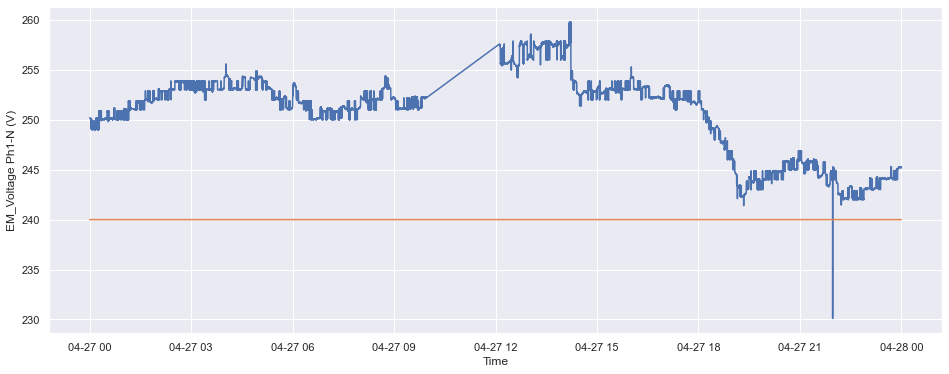

In [50]:
sns.set(style="darkgrid")

plt.figure(figsize=(16, 6)) 
 
# Plot the responses for different events and regions
sns.lineplot(x="Time", y="EM_Voltage Ph1-N (V)",data=df1)
sns.lineplot(x="Time",y=240,data=df1)

In [51]:
#OUT OF BOUND
df1['flag']=np.where(df1['EM_Voltage Ph1-N (V)'] > 245 | (df1['EM_Voltage Ph1-N (V)'] < 190),1,0)
df1.head()

,Time,EM_Voltage Ph1-N (V),EM_Current Ph1 (A),EM_Energy (kWh),EM_id,flag
9326,2020-04-27 23:59:59,245.2,178.9,200.39 K,1,1
9327,2020-04-27 23:59:57,245.2,176.9,200.02 K,1,1
9328,2020-04-27 23:59:55,245.2,178.8,200.39 K,1,1
9329,2020-04-27 23:59:53,245.2,174.9,200.35 K,1,1
9330,2020-04-27 23:59:51,245.2,160.9,200.50 K,1,1


In [52]:
duration=df1[df1.flag==1].groupby(df1[df1.flag==1].index.to_series().diff().ne(1).cumsum())['Time'].agg(lambda x: abs((x.iloc[-1] - x.iloc[0]).total_seconds()))
duration

1    42787.0
2    35984.0
Name: Time, dtype: float64

In [53]:
df1=df1[df1.flag==1]

In [54]:
duration=df1.groupby(df1.index.to_series().diff().ne(1).cumsum())['Time'].agg(lambda x: abs((x.iloc[-1] - x.iloc[0]).total_seconds()))
duration

SyntaxError: invalid syntax (<ipython-input-54-1479d990965a>, line 1)

In [17]:
print("Time duration at which Voltage was more than Threshold",duration.sum()/3600,"hrs")

Time duration at which Voltage was more than Threshold 21.88083333333333 hrs


In [18]:
df['only_date'] = df['Time'].dt.date
df['only_date'] = pd.to_datetime(df['only_date'], errors='coerce')
df['day_of_week'] = df['only_date'].dt.day_name()


In [19]:
df=df[(df['Time'] >= '2020-04-13 00:00:00') & (df['Time'] < '2020-04-20 00:00:00') ]
df['only_date'].unique()

array(['2020-04-19T00:00:00.000000000', '2020-04-18T00:00:00.000000000',
       '2020-04-17T00:00:00.000000000', '2020-04-16T00:00:00.000000000',
       '2020-04-15T00:00:00.000000000', '2020-04-14T00:00:00.000000000',
       '2020-04-13T00:00:00.000000000'], dtype='datetime64[ns]')

In [20]:
dfnot0=df[(df['EM_Voltage Ph1-N (V)'] > 0)]
df0=df[(df['EM_Voltage Ph1-N (V)'] == 0)]

In [21]:
df0['day_of_week'].unique()

array(['Saturday'], dtype=object)

In [22]:
len(df0)

1316

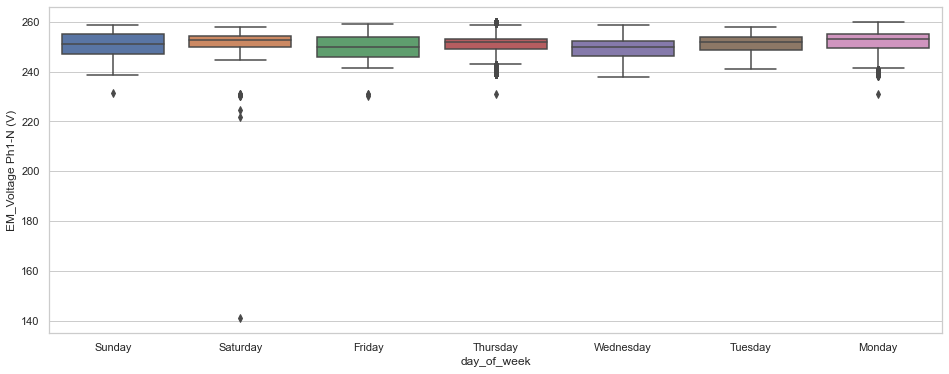

In [23]:
plt.figure(figsize=(16, 6)) 
sns.set_style('whitegrid')
ax= sns.boxplot(x='day_of_week',y='EM_Voltage Ph1-N (V)',data=dfnot0)
#ax.set(ylim=(200, 265))

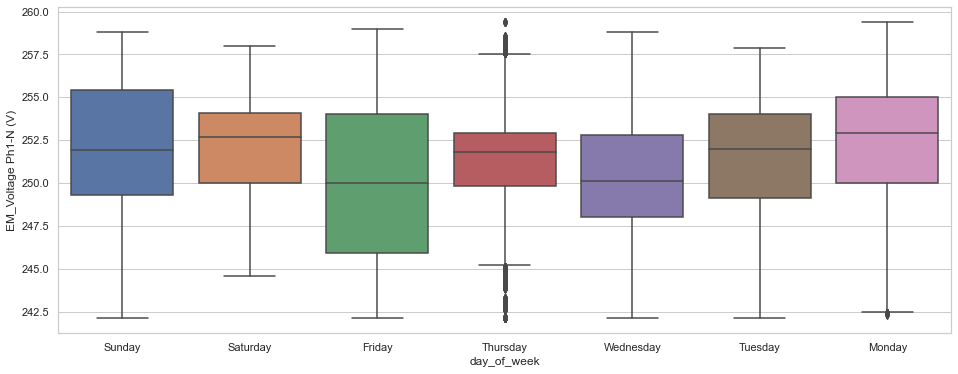

In [24]:
from scipy import stats
dff=dfnot0[(np.abs(stats.zscore(dfnot0['EM_Voltage Ph1-N (V)'])) < 2)] 

plt.figure(figsize=(16, 6)) 
sns.set_style('whitegrid')
ax= sns.boxplot(x='day_of_week',y='EM_Voltage Ph1-N (V)',data=dff)
#ax.set(ylim=(200, 265))


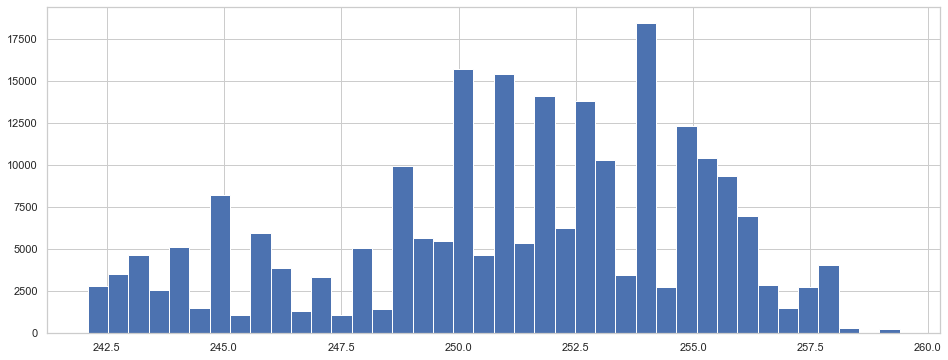

In [25]:
plt.figure(figsize=(16, 6)) 
plt.hist(dff['EM_Voltage Ph1-N (V)'],bins=40)
#plt.axvline(x.mean(), color='k', linestyle='dashed', linewidth=1)
plt.show()

In [26]:
dff.describe()

,EM_Voltage Ph1-N (V),EM_Current Ph1 (A),EM_id
count,233595.000000,233595.000000,233595.0
mean,251.129791,188.922826,1.0
std,3.930703,42.052971,0.0
min,242.100000,0.000000,1.0
25%,249.000000,163.900000,1.0
50%,251.800000,191.400000,1.0
75%,254.100000,209.900000,1.0
max,259.400000,361.700000,1.0


In [27]:
print(dff['EM_Voltage Ph1-N (V)'].mean()-240) ###Difference with the threshold value

11.129791305464494


In [28]:
q1=dff['EM_Voltage Ph1-N (V)'].quantile(0.25)
q3=dff['EM_Voltage Ph1-N (V)'].quantile(0.75)
iqr=q3-q1
iqr


5.099999999999994

In [29]:
dff[dff['day_of_week']=='Monday']['EM_Voltage Ph1-N (V)'].quantile(0.75)-dff[dff['day_of_week']=='Monday']['EM_Voltage Ph1-N (V)'].quantile(0.25)

5.0

In [30]:
dff[dff['day_of_week']=='Thursday']['EM_Voltage Ph1-N (V)'].quantile(0.75)-dff[dff['day_of_week']=='Monday']['EM_Voltage Ph1-N (V)'].quantile(0.25)

2.9000000000000057

In [31]:
diffs_a = pd.rolling_apply(dff['EM_Voltage Ph1-N (V)'], 2, lambda x: x[0] - x[1])

AttributeError: module 'pandas' has no attribute 'rolling_apply'